# Exercises for Lecture 4 (Performance analysis)

In [1]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2022-01-14 13:51:32


In [2]:
# Common imports
import os
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42) # To make this notebook's output stable across runs

In [3]:
# Fetch MNIST dataset
import requests  
  
url = "https://drive.google.com/uc?export=download&id=1_DqI-pH7gV5RuWxQ4IT1U7PrmSLLhc2a"
mnist = requests.get(url)
with open('mnist.npz', 'wb') as f:
    f.write(mnist.content)

In [4]:
mnist = np.load('mnist.npz')
X_train, y_train = mnist['x_train'], mnist['y_train']
X_test, y_test = mnist['x_test'], mnist['y_test']

y_train.shape, y_test.shape, X_train.shape, X_test.shape

((60000,), (10000,), (60000, 28, 28), (10000, 28, 28))

Reshape X_train and X_test to a 2D array

In [5]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

## Exercise 1 : Compute number of examples of each digit.

In [6]:
n_digits = 10
for i in range(n_digits):
    print(i, X_train[np.where(y_train == i)].shape[0])

0 5923
1 6742
2 5958
3 6131
4 5842
5 5421
6 5918
7 6265
8 5851
9 5949


## Exercise 2: Construct target train and test vectors for 8 classifier.

In [7]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [8]:
y_train_8 = (y_train == 8)
y_test_8 = (y_test == 8)

In [9]:
y_test_8

array([False, False, False, ..., False, False, False])

## Exercise 3: Use Scikit-Learn to perform 3-fold cross validation using [`cross_val_score`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=10);
sgd_clf.fit(X_train, y_train_8)
cross_val_score(sgd_clf, X_train, y_train_8, cv=3, scoring="accuracy")

/opt/hostedtoolcache/Python/3.8.12/x64/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/hostedtoolcache/Python/3.8.12/x64/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/hostedtoolcache/Python/3.8.12/x64/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/hostedtoolcache/Python/3.8.12/x64/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

array([0.8601 , 0.77525, 0.92435])

Around 95% accuracy seems fairly good.

## Exercise 4: Compute the confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3)

conf_matrix = confusion_matrix(y_train_8, y_train_pred)
conf_matrix

/opt/hostedtoolcache/Python/3.8.12/x64/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/hostedtoolcache/Python/3.8.12/x64/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/hostedtoolcache/Python/3.8.12/x64/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[46798,  7351],
       [ 1455,  4396]])

## Exercise 5: Compute the precision and recall for the confusion matrix `conf_matrix` computed above.

Compute by hand and then using Scikit-Learn [precision_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) and [recall_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score).

In [12]:
conf_matrix

array([[46798,  7351],
       [ 1455,  4396]])

In [13]:
TN, FP, FN, TP = conf_matrix[0,0], conf_matrix[0,1], conf_matrix[1,0], conf_matrix[1,1]
TN, FP, FN, TP

(46798, 7351, 1455, 4396)

In [14]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
precision, recall

(0.374223205924917, 0.7513245599042898)

In [15]:
from sklearn.metrics import precision_score, recall_score
precision_sklearn = precision_score(y_train_8, y_train_pred)
recall_sklearn = recall_score(y_train_8, y_train_pred)
precision_sklearn, recall_sklearn

(0.374223205924917, 0.7513245599042898)

## Exercise 6: Compute the $F_1$ score for the confusion matrix `conf_matrix` computed above.

Compute by hand and then using Scikit-Learn [f1_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).

In [16]:
conf_matrix

array([[46798,  7351],
       [ 1455,  4396]])

In [17]:
f1 = TP / (TP + (FN+FP)/2)
f1

0.4996022275258552

In [18]:
from sklearn.metrics import f1_score
f1_sklearn = f1_score(y_train_8, y_train_pred)
f1_sklearn

0.4996022275258552

## Exercise 7: Compute the false positive rate for the confusion matrix `conf_matrix` computed above.

In [19]:
conf_matrix

array([[46798,  7351],
       [ 1455,  4396]])

Recall:
<table>
  <tr>
    <td></td>
    <td></td>
    <td>**Predicted**</td>
    <td></td>
  </tr>
  <tr>
    <td></td>
    <td></td>
    <td>Negative</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td>**Actual**</td>
    <td>Negative</td>
    <td>TN</td>
    <td>FP</td>
  </tr>
  <tr>
    <td></td>
    <td>Positive</td>
    <td>FN</td>
    <td>TP</td>
  </tr>
</table>

In [20]:
false_positive = FP / (FP + TN)
false_positive

0.13575504626124213

## Exercise 8: Where is the ideal point in the ROC curve domain?

Ideal point is $\text{FPR} = 0$ and $\text{TPR} = 1$, i.e. top left corner. 

##  Exercise 9: What is the AUC for an ideal and random classifier?

- Ideal classifier: $\text{AUC} = 1$
- Random classifier: $\text{AUC} = 0.5$

Consider the confusion matrix for multiclass classification.

In [21]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/opt/hostedtoolcache/Python/3.8.12/x64/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/hostedtoolcache/Python/3.8.12/x64/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/hostedtoolcache/Python/3.8.12/x64/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[5765,    2,   16,   16,    7,   21,   33,    9,   48,    6],
       [   1, 6470,   41,   17,    9,   35,   13,   16,  138,    2],
       [  79,   52, 5155,  153,   39,   31,  171,   85,  181,   12],
       [  80,   40,  224, 5087,   19,  286,   62,   78,  217,   38],
       [  37,   30,   46,   15, 5101,   22,   64,   75,  315,  137],
       [ 127,   27,   35,  208,   48, 4451,  175,   35,  259,   56],
       [  45,   10,   57,    3,   19,  112, 5611,   11,   45,    5],
       [  25,   32,   91,   49,   50,   15,    8, 5824,   81,   90],
       [  70,  175,  127,  278,   43,  394,   86,   51, 4571,   56],
       [  48,   33,   54,  117,  326,   99,    5,  801,  834, 3632]])

## Exercise 10: Convert confusion matrix to probabilities and plot.

In [22]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

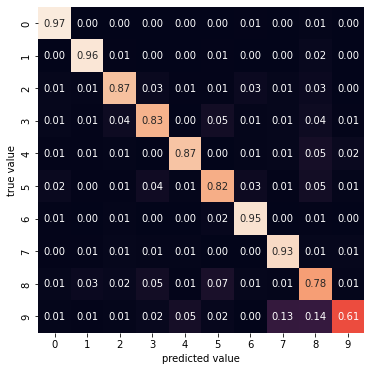

In [23]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(norm_conf_mx, square=True, annot=True, cbar=False, fmt='.2f')
plt.xlabel('predicted value')
plt.ylabel('true value');